In [1]:
# imports 
from pprint import pprint
from matplotlib import pyplot as plt
import yaml
from xmlpathology.argconfigparser import argconfigparser

from xmlpathology.xmlbatchgenerator.core.generators import XmlBatchGeneratorVanilla

import numpy as np

In [2]:
config = argconfigparser.parse('/home/mart/radboudumc/lib/hooknet/hooknet/config/parameters.yml', notebook=True)

In [7]:
""" 
Data setup
"""

# get the data from datasource.yml:

# ---
# training:
#   -
#     annotation_path: /home/mart/radboudumc/data/xmls/level1/T10-00485-I-19-1-gr3.xml
#     image_path: /home/mart/radboudumc/data/images/level1/T10-00485-I-19-1-gr3.tif
# 

data_sources_path = '/home/mart/radboudumc/lib/data.yml'
with open(data_sources_path) as f:
    data_sources = yaml.load(f, yaml.FullLoader)
    
print('data sources:')
pprint(data_sources)


"""
Label map
"""

# set the label_map, which maps labels that are in the annotation file to label_values:
label_map = {
    'dcis': 1,
    'fatty tissue': 2,
    'stroma': 4,
}

inverse_label_map = {value:key for key, value in label_map.items()}

print('label map:')
pprint(label_map)

data sources:
{'training': [{'annotation_path': '/home/mart/radboudumc/data/xmls/level1/T10-00485-I-19-1-gr3.xml',
               'image_path': '/home/mart/radboudumc/data/images/level1/T10-00485-I-19-1-gr3.tif'},
              {'annotation_path': '/home/mart/radboudumc/data/xmls/level1/T17-015137_II_5_HE.xml',
               'image_path': '/home/mart/radboudumc/data/images/level1/T17-015137_II_5_HE.tif'}]}
label map:
{'dcis': 1, 'fatty tissue': 2, 'stroma': 4}


In [39]:
"""
Label map
"""

# set the label_map, which maps labels that are in the annotation file to label_values:
label_map = {
    'dcis': 1,
    'stroma': 4,
}

inverse_label_map = {value:key for key, value in label_map.items()}

print('label map:')
pprint(label_map)

label map:
{'dcis': 1, 'stroma': 4}


In [55]:
"""
Starting the XmlBatchGeneratorVanilla
"""

batchgenerator = XmlBatchGeneratorVanilla(data_sources=data_sources,
                                          label_map=label_map,
                                          batch_size=4,
                                          input_shape=(64,64,3),
                                          spacing=4.0)

# start batch generator
batchgenerator.start()

# get training batch
batch = batchgenerator.batch('training')

'_open_image_annotations'  178.51 ms
batch generator started (single core)


In [56]:
"""
Retreiving a batch
"""

batch = batchgenerator.batch('training')

patches, masks = batch

print('Shape patches in batch:', patches.shape)
print('Shape masks in batch:', masks.shape)

Shape patches in batch: (4, 64, 64, 3)
Shape masks in batch: (4, 64, 64)


In [23]:
batch_size = 4
input_shape =(64,64,3)
spacing = 4.0
task = 'segmentation'

# batchgenerator = XmlBatchGeneratorVanilla(data_sources=data_sources,
#                                           label_map=label_map,
#                                           batch_size=batch_size,
#                                           input_shape=input_shape,
#                                           spacing=spacing,
#                                           task=task)
batchgenerator.start()

batch = batchgenerator.batch('training')
patches, masks  = batch

print('Shape patches in batch:', patches.shape)
print('Shape masks in batch:', masks.shape)

batch generator started (single core)
Shape patches in batch: (2, 64, 64, 3)
Shape masks in batch: (2, 64, 64)


In [111]:
batch_size = 10
input_shape =(64,64,3)
spacing = 4.0


batchgenerator = XmlBatchGeneratorVanilla(data_sources=data_sources,
                                          label_map=label_map,
                                          batch_size=batch_size,
                                          input_shape=input_shape,
                                          seed=4,
                                          spacing=spacing)
batchgenerator.start()

batch = batchgenerator.batch('training')
patches, _  = batch
print('Shape patches in batch:', patches.shape)

batch generator started (single core)
Shape patches in batch: (10, 64, 64, 3)


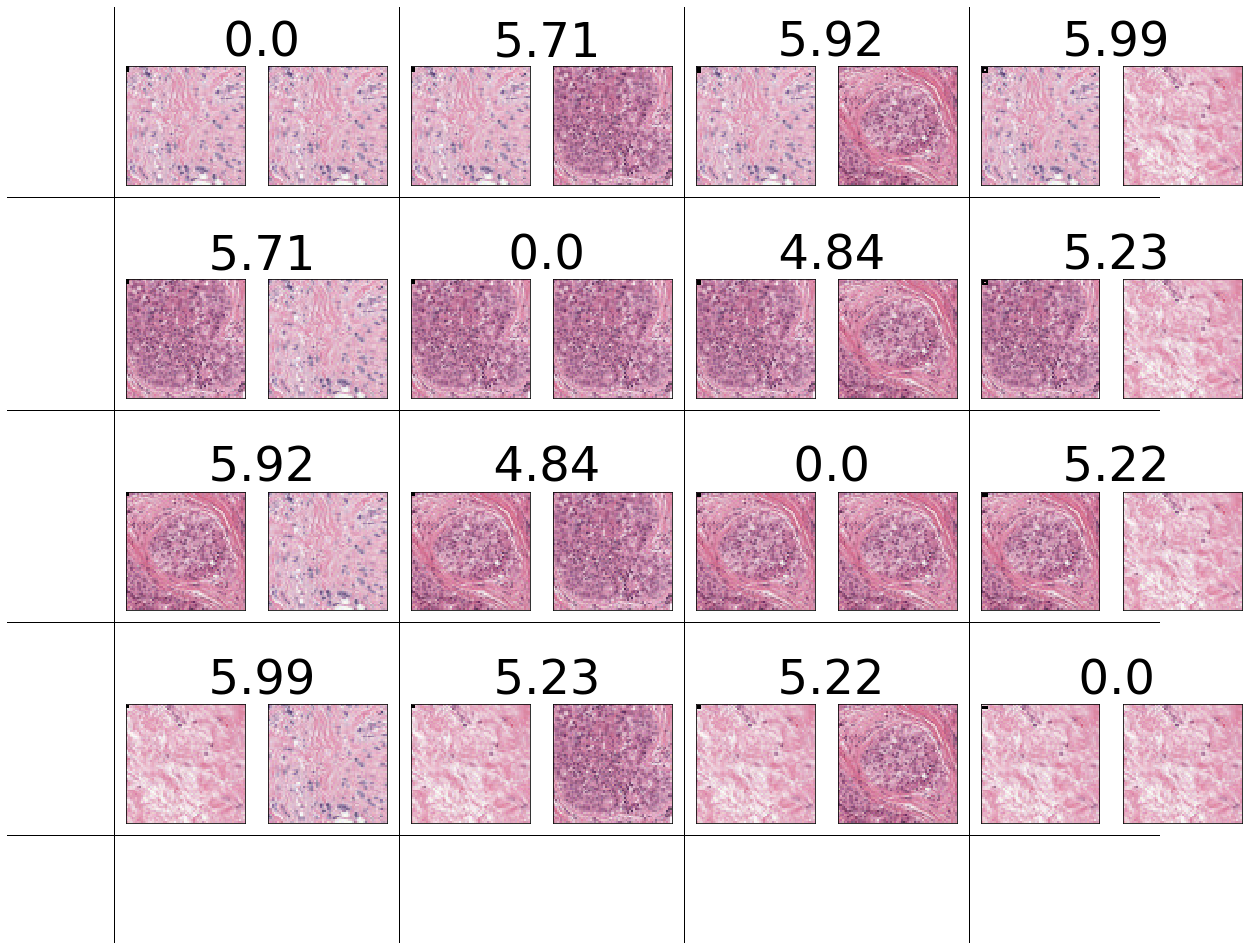

In [66]:
fig, axes = plt.subplots(4, 8, figsize=(20,15))


for y in range(0,4,1):
    for x in range(0, 8, 2):
        
        axes[y][x].imshow(patches[y])
        axes[y][x+1].imshow(patches[x//2])
        
        autoAxis = axes[y][x].get_position().get_points()
        autoAxis2 = axes[y][x+1].get_position().get_points()
        
        width = autoAxis[1][0] + autoAxis2[1][0]
        height = autoAxis[1][1] + autoAxis2[1][1]
        axes[y][x].xaxis.set_visible(False)
        axes[y][x].yaxis.set_visible(False)
        axes[y][x+1].xaxis.set_visible(False)
        axes[y][x+1].yaxis.set_visible(False)
        rec = plt.Rectangle((autoAxis[0][0],autoAxis[0][0]),width+0.2, height+0.2,fill=False,lw=2)
        rec = axes[y][x].add_patch(rec)
        rec.set_clip_on(False)
        axes[y][x].set_title('          ' + str(arr[y][x//2]), fontdict={'fontsize': 48})
        axes[y][x+1].plot([-0.1, -0.1 ], [-1, 1.5], color='black', lw=1, transform=axes[y][x].transAxes, clip_on=False)
        axes[y][x+1].plot([-1, 1.5], [-0.1, -0.1 ], color='black', lw=1, transform=axes[y][x].transAxes, clip_on=False)


fig.savefig('/home/mart/Pictures/presentation.png', dpi=fig.dpi)

In [63]:
#TODO 

"""
documentation
error checking
sample callbacks
batch callbacks
"""


'\ndocumentation\nerror checking\nsample callbacks\nbatch callbacks\n'

In [24]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


In [32]:
from keras.models import load_model
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')
import keras as K
model = load_model('/home/mart/radboudumc/david_weights/supervsied_enc_2019_4tasks.h5', compile=False)

In [57]:
data = model.predict_on_batch(patches)

In [58]:
arr = dist.pairwise(data)
arr = np.around(arr, 2)

In [59]:
arr

array([[0.  , 5.71, 5.92, 5.99],
       [5.71, 0.  , 4.84, 5.23],
       [5.92, 4.84, 0.  , 5.22],
       [5.99, 5.23, 5.22, 0.  ]])

In [36]:
df_cm = pd.DataFrame(arr, range(10), range(10))
plt.figure(figsize=(15,10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

ValueError: Shape of passed values is (4, 4), indices imply (10, 10)